### Параметры



In [143]:
import numpy as np
from scipy.integrate import quad
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
folder = 'pics/'

In [145]:
tau = 0.5
a = 0.7
b = 0.05
theta = a * b
sigma = 0.1
T_n = 30
r_t = 0.05

In [146]:
def B(t, T):
    return (1 - np.e ** (- a * (T - t))) / a


def A(t, T):
    return np.e ** ((B(t, T) - (T - t)) * (theta / a - sigma ** 2 / (2 * a ** 2)) - sigma ** 2 * B(t, T) ** 2 / (4 * a))

In [147]:
def P(t, T):
    return A(t, T) * np.e ** (- r_t * B(t, T))

In [148]:
def convexity_adj(t, T1, T2):
    
    I = sigma**2 / a**2 * (1/(2 *a) - 1/(2*a) * np.e ** (-2*a*(T1-t)) -\
                           1/a * np.e**(-a*(T2-T1)) + 1/a * np.e**(-a*(T1+T2) + 2*a*t)) + \
                           1/(2*a) * np.e**(-2*a*(T2-T1)) - 1/(2*a) * np.e**(-2*a*(T2-t))     
                           
    return tau * ((P(t, T1) / P(t, T2))**2 * np.e**I - 2 * (P(t, T1) / P(t, T2)) + 1)

In [149]:
T = np.arange(0, T_n, tau)

In [155]:
convexity1 = np.zeros(len(T))
convexity2 = np.zeros(len(T))
for i in np.arange(len(T)-1):
    convexity1[i] = convexity_adj(0, T[i], T[i+1])
    
b = 0.001   
convexity2 = np.zeros(len(T))
for i in np.arange(len(T)-1):
    convexity2[i] = convexity_adj(0, T[i], T[i+1])    

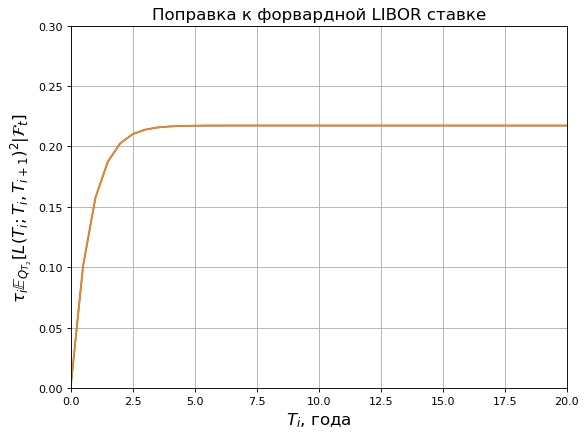

In [156]:
fig = plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(T, convexity1)
plt.plot(T, convexity2)
plt.axis([0, 20, 0, 0.3])
plt.grid(True)
plt.title(u'Поправка к форвардной LIBOR ставке', fontsize=15)
plt.ylabel('$\\tau_i\mathbb{E}_{Q_{T_2}}[L(T_i;T_i,T_{i+1})^2\\vert\mathcal{F}_t]$', fontsize=15)
plt.xlabel(u'$T_i$, года', fontsize=15)
plt.show()
fig.savefig(folder + 'conv-adj.png', dpi=fig.dpi, transparent=True)

In [152]:
 = plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(T, convexity)
plt.axis([0, 20, 0, 0.3])
plt.grid(True)
plt.title(u'Поправка к форвардной LIBOR ставке', fontsize=15)
plt.ylabel('$\\tau_i\mathbb{E}_{Q_{T_2}}[L(T_i;T_i,T_{i+1})^2\\vert\mathcal{F}_t]$', fontsize=15)
plt.xlabel(u'$T_i$, года', fontsize=15)
plt.show()
fig.savefig(folder + 'conv-adj.png', dpi=fig.dpi, transparent=True)

SyntaxError: invalid syntax (<ipython-input-152-f7f462d78dfe>, line 1)

$\tau$

In [ ]:
T1=0
T2=0.5
t=0
I = sigma**2 / a**2 * (1/(2 *a) - 1/(2*a) * np.e ** (-2*a*(T1-t)) -\
                           1/a * np.e**(-a*(T2-T1)) + 1/a * np.e**(-a*(T1+T2) + 2*a*t)) + \
                           1/(2*a) * np.e**(-2*a*(T2-T1)) - 1/(2*a) * np.e**(-2*a*(T2-t)) 
print np.e**I